<a href="https://colab.research.google.com/github/Bismah008/AI-PDE-Research-Onramp/blob/main/AI_PDE_Research_Onramp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **Research Onramp: AI‑Assisted PDE Micro‑Projects for Undergraduates**

**Objective:**  
This notebook demonstrates how Partial Differential Equations (PDEs) can be connected to AI methods. We simulate the heat equation, add synthetic noisy data, and use regression to estimate parameters. The goal is to show undergraduates how math models link to modern AI workflows.


## **Step 1: Import Libraries**

We use **NumPy** for numerical calculations and **Matplotlib** for visualization. These are standard tools for scientific computing in Python.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## **Step 2: PDE Simulation**

We simulate the **heat equation** on a 2D grid.This shows how heat spreads from a source over time. It is a simple example of PDE modeling in applied mathematics.

In [4]:
def simulate_heat_equation(nx=50, ny=50, nt=100, alpha=0.01):
    u = np.zeros((nx, ny))
    u[nx//2, ny//2] = 100  # initial heat source in center

    for t in range(nt):
        u[1:-1,1:-1] += alpha * (
            u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1]
        )
    return u

## **Step 3: Visualize Results**

We plot the final heat distribution as a heatmap. This helps us see how the PDE evolves and stabilizes.

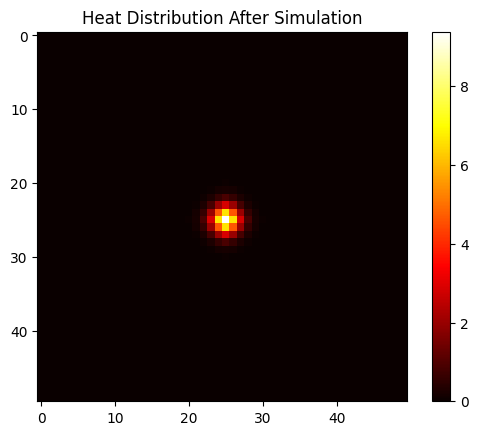

In [5]:
u_final = simulate_heat_equation()
plt.imshow(u_final, cmap='hot')
plt.title("Heat Distribution After Simulation")
plt.colorbar()
plt.show()

## **Step 4: Add Synthetic Data**

Real experiments often include noise. We add synthetic noise to our simulation to mimic real-world measurements. This prepares the data for AI-assisted analysis.


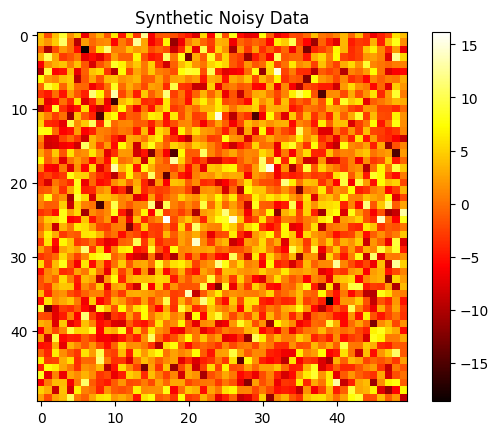

In [6]:
def generate_noisy_data(u, noise_level=5):
    noisy_u = u + np.random.normal(0, noise_level, u.shape)
    return noisy_u

noisy_data = generate_noisy_data(u_final)
plt.imshow(noisy_data, cmap='hot')
plt.title("Synthetic Noisy Data")
plt.colorbar()
plt.show()

## **Step 5: AI Calibration**

We use **linear regression** to estimate the diffusivity parameter (alpha). This demonstrates how AI can assist in interpreting mathematical models. It shows the principle of *Human–AI collaboration*.


In [7]:
from sklearn.linear_model import LinearRegression

# Flatten data for regression
X = u_final.flatten().reshape(-1, 1)  # true values
y = noisy_data.flatten()             # observed noisy values

model = LinearRegression()
model.fit(X, y)

estimated_alpha = model.coef_[0]
print(f"Estimated diffusivity (alpha): {estimated_alpha:.4f}")

Estimated diffusivity (alpha): 1.0959


## **Step 6: Reflection Questions**

These questions encourage students to think critically about the process.


In [8]:
# Reflection prompts
print("Reflection Questions:")
print("1. How does noise affect the accuracy of parameter estimation?")
print("2. What assumptions does our AI model make?")
print("3. How might this workflow change with real experimental data?")

Reflection Questions:
1. How does noise affect the accuracy of parameter estimation?
2. What assumptions does our AI model make?
3. How might this workflow change with real experimental data?
